In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,PowerTransformer
from feature_engine.encoding import WoEEncoder

from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [2]:
df=pd.read_csv('Clean.csv',index_col=0)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year
0,10000.000000,36 months,11.440000,329.480000,B,B4,Marketing,10+ years,RENT,117000.000000,Not Verified,Fully Paid,vacation,Vacation,26.240000,16,0,36369.000000,41.800000,25,w,INDIVIDUAL,0,0,2015,1,6,1990
1,8000.000000,36 months,11.990000,265.680000,B,B5,Credit analyst,4 years,MORTGAGE,65000.000000,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.050000,17,0,20131.000000,53.300000,27,f,INDIVIDUAL,3,0,2015,1,7,2004
2,15600.000000,36 months,10.490000,506.970000,B,B3,Statistician,< 1 year,RENT,43057.000000,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.790000,13,0,11987.000000,92.200000,26,f,INDIVIDUAL,0,0,2015,1,8,2007
3,7200.000000,36 months,6.490000,220.650000,A,A2,Client Advocate,6 years,RENT,54000.000000,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.600000,6,0,5472.000000,21.500000,13,f,INDIVIDUAL,0,0,2014,11,9,2006
4,24375.000000,60 months,17.270000,609.330000,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.000000,Verified,Charged Off,credit_card,Credit Card Refinance,33.950000,13,0,24584.000000,69.800000,43,f,INDIVIDUAL,1,0,2013,4,3,1999


In [3]:
# getting rid of the redundant columns and rows
df1=df[~(df['dti']>300)]
df1.drop(columns=['issue_year', 'issue_month','earliest_cr_line_month', 'earliest_cr_line_year','sub_grade','initial_list_status','emp_title','title','initial_list_status'],inplace=True)

## Scalling the data

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

In [4]:
df1_num=df1.select_dtypes(include=np.number)
df1_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.000000,11.440000,329.480000,117000.000000,26.240000,16,0,36369.000000,41.800000,25,0,0
1,8000.000000,11.990000,265.680000,65000.000000,22.050000,17,0,20131.000000,53.300000,27,3,0
2,15600.000000,10.490000,506.970000,43057.000000,12.790000,13,0,11987.000000,92.200000,26,0,0
3,7200.000000,6.490000,220.650000,54000.000000,2.600000,6,0,5472.000000,21.500000,13,0,0
4,24375.000000,17.270000,609.330000,55000.000000,33.950000,13,0,24584.000000,69.800000,43,1,0


In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1_scaled=pd.DataFrame(ss.fit_transform(df1_num),columns=df1_num.columns)
df1_scaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.492242,-0.491799,-0.408290,0.694323,1.092107,0.912659,-0.335786,0.996727,-0.490616,-0.034885,-0.844169,-0.341284
1,-0.731550,-0.368816,-0.662750,-0.149320,0.577418,1.107302,-0.335786,0.208163,-0.020148,0.133368,0.614391,-0.341284
2,0.177821,-0.704225,0.299610,-0.505321,-0.560058,0.328730,-0.335786,-0.187332,1.571263,0.049241,-0.844169,-0.341284
3,-0.827273,-1.598647,-0.842347,-0.327783,-1.811773,-1.033772,-0.335786,-0.503719,-1.321095,-1.044402,-0.844169,-0.341284
4,1.227785,0.811821,0.707862,-0.311559,2.039185,0.328730,-0.335786,0.424414,0.654872,1.479390,-0.357982,-0.341284


## KNN on the numerical variables

#### creating genaralized functions

In [167]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model,X_train):
    
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [168]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model,X_test):
    
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [14]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    
    cm = confusion_matrix(y_test, y_pred)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

  
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [15]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    

    y_pred_prob = model.predict_proba(test_data)[:,1]
    
   
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

   
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [16]:
# encoding the target categories
df1['loan_status']=df1['loan_status'].map({'Fully Paid':0,'Charged Off':1})

In [17]:
X=df1_scaled.copy()
y=df1.loan_status

#splitting test train sets with 30:70 ratio respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (277218, 12)
y_train (277218,)
X_test (118809, 12)
y_test (118809,)


In [21]:
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)


# compute the performance measures on train data
train_report = get_train_report(knn_model)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(knn_model)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91    222746
           1       0.72      0.44      0.55     54472

    accuracy                           0.86    277218
   macro avg       0.80      0.70      0.73    277218
weighted avg       0.84      0.86      0.84    277218

Test data:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86     95609
           1       0.32      0.19      0.24     23200

    accuracy                           0.76    118809
   macro avg       0.57      0.55      0.55    118809
weighted avg       0.72      0.76      0.74    118809



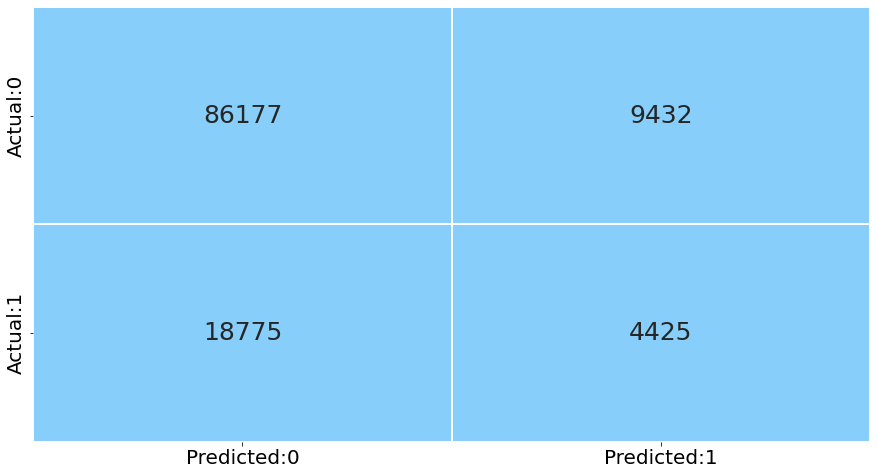

In [22]:
plot_confusion_matrix(knn_model,X_test)

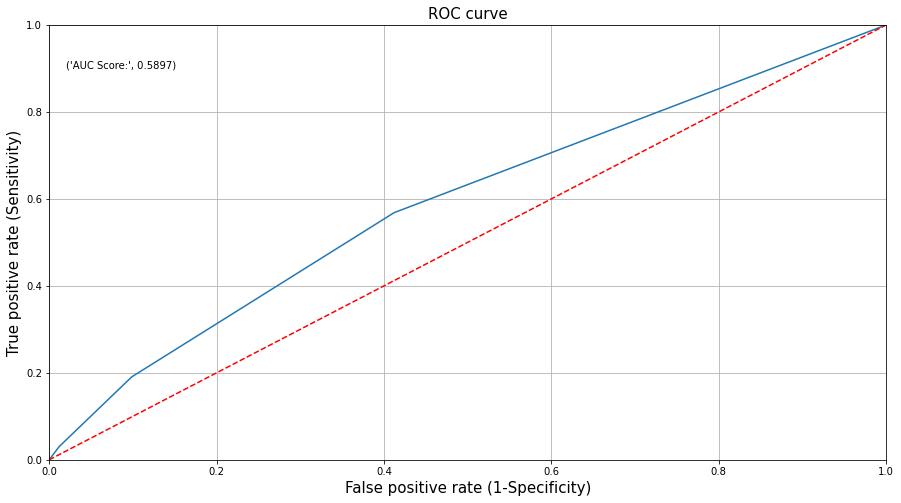

In [23]:
plot_roc(knn_model,X_test)

## Stack model(randomforest,knn,baysmodel)

In [25]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [27]:
# compute the performance measures on train data
train_report = get_train_report(stack_model)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(stack_model)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87    222746
           1       0.42      0.34      0.38     54472

    accuracy                           0.78    277218
   macro avg       0.64      0.61      0.62    277218
weighted avg       0.76      0.78      0.77    277218

Test data:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     95609
           1       0.38      0.31      0.34     23200

    accuracy                           0.77    118809
   macro avg       0.61      0.59      0.60    118809
weighted avg       0.75      0.77      0.76    118809



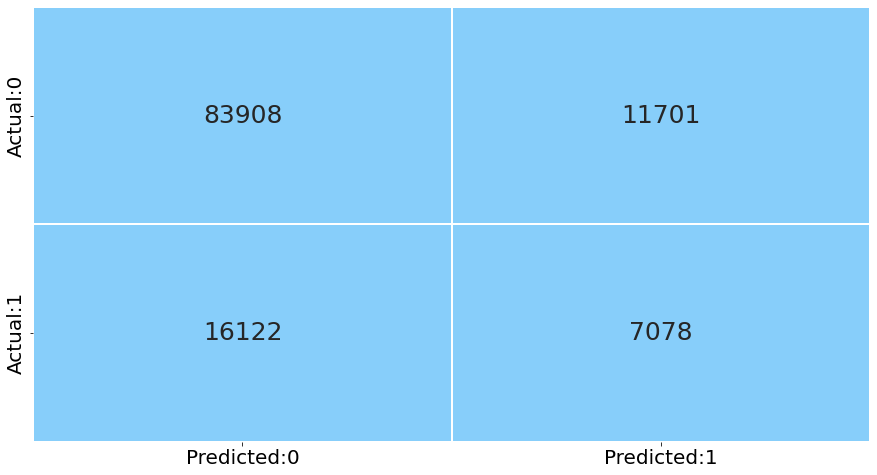

In [26]:
plot_confusion_matrix(stack_model,X_test)

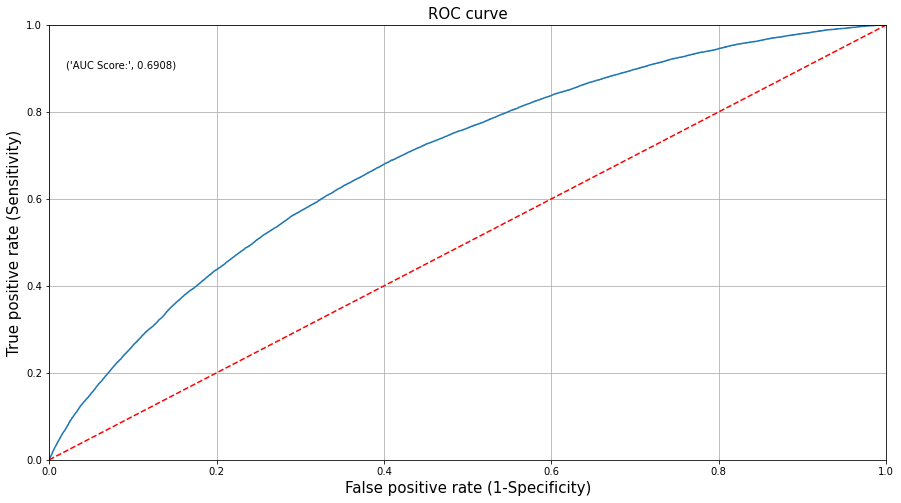

In [132]:
plot_roc(stack_model,X_test)

## PCA

In [42]:
from sklearn.decomposition import PCA

In [30]:
df1_scaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.492242,-0.491799,-0.408290,0.694323,1.092107,0.912659,-0.335786,0.996727,-0.490616,-0.034885,-0.844169,-0.341284
1,-0.731550,-0.368816,-0.662750,-0.149320,0.577418,1.107302,-0.335786,0.208163,-0.020148,0.133368,0.614391,-0.341284
2,0.177821,-0.704225,0.299610,-0.505321,-0.560058,0.328730,-0.335786,-0.187332,1.571263,0.049241,-0.844169,-0.341284
3,-0.827273,-1.598647,-0.842347,-0.327783,-1.811773,-1.033772,-0.335786,-0.503719,-1.321095,-1.044402,-0.844169,-0.341284
4,1.227785,0.811821,0.707862,-0.311559,2.039185,0.328730,-0.335786,0.424414,0.654872,1.479390,-0.357982,-0.341284


In [31]:
# getting the power transformed values from the library
from sklearn.preprocessing import PowerTransformer

In [34]:
# power transforming for PCA
pt=PowerTransformer()
a=pt.fit_transform(df1_scaled)
df1_scaledpt=pd.DataFrame(a,columns=df1_scaled.columns)
df1_scaledpt.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.381812,-0.436277,-0.269782,1.203812,1.085005,1.006194,-0.413213,1.498846,-0.517109,0.128237,-1.134147,-0.358560
1,-0.715706,-0.299890,-0.628725,0.059024,0.618897,1.146044,-0.413213,0.791436,-0.056077,0.300632,0.969087,-0.358560
2,0.387551,-0.678543,0.519599,-0.834234,-0.525380,0.528310,-0.413213,0.065619,1.627022,0.216055,-1.134147,-0.358560
3,-0.857209,-1.777018,-0.904206,-0.350707,-1.965741,-1.212503,-0.413213,-0.873994,-1.297846,-1.160435,-1.134147,-0.358560
4,1.213723,0.847604,0.859991,-0.310339,1.894382,0.528310,-0.413213,1.047629,0.638371,1.386817,-0.117426,-0.358560


In [35]:
# getting the covariant matrix
cov_mat = np.cov(df1_scaledpt.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00000253  0.13936257  0.96910593  0.5018498   0.05223086  0.21870477
  -0.09900777  0.4639557   0.10226413  0.24139045  0.22403103 -0.10655967]
 [ 0.13936257  1.00000253  0.14384012 -0.09489867  0.17823321  0.0034704
   0.07480107  0.00648795  0.30717909 -0.0507804  -0.09459785  0.06370066]
 [ 0.96910593  0.14384012  1.00000253  0.4841564   0.05421021  0.211269
  -0.08988377  0.45256282  0.12816618  0.2211682   0.19595861 -0.09896606]
 [ 0.5018498  -0.09489867  0.4841564   1.00000253 -0.20637018  0.24639184
  -0.04666509  0.40475878  0.05783572  0.34046599  0.35973855 -0.07152085]
 [ 0.05223086  0.17823321  0.05421021 -0.20637018  1.00000253  0.33505924
  -0.03898197  0.25832891  0.19869017  0.24760413 -0.03952779 -0.0301424 ]]


In [36]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [3.3476686  1.96188845 1.55936779 1.59292318 1.01503145 0.76756444
 0.65888776 0.02952764 0.37228535 0.33974577 0.22397588 0.13116398] 

Eigenvectors: 
 
 [[ 0.44375622  0.01982864 -0.30147696 -0.13572363 -0.33360639 -0.06798858
   0.21409431 -0.7148732   0.08190667  0.11490756  0.02579832  0.0020587 ]
 [ 0.04092921  0.04143369  0.06413516 -0.55932517 -0.2024601   0.70184199
  -0.24625878  0.01377042  0.00153665 -0.25508819 -0.14168489  0.009892  ]
 [ 0.43619055  0.02507392 -0.303469   -0.15722781 -0.34009802 -0.08941762
   0.20460789  0.69696044  0.09091544  0.16018953  0.08396153 -0.00623101]
 [ 0.36644485 -0.0874571  -0.30626704  0.17424717  0.17367349  0.00865924
  -0.4159804   0.01074382 -0.71083678 -0.14859722  0.03540854  0.04349076]
 [ 0.12246784  0.00262943  0.58501803 -0.27938332 -0.08498421 -0.17550203
   0.476357    0.00404523 -0.53877359 -0.09702656 -0.00230233  0.00644362]
 [ 0.30381855 -0.22732345  0.45352308  0.16196355 -0.19102316 -0.0107638
  -0.33224

In [37]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[3.3476686018357267, 1.9618884536268768, 1.592923180248227, 1.5593677932235606, 1.015031448147944, 0.767564442156253, 0.6588877621931547, 0.3722853521783741, 0.33974576753981567, 0.22397587971801103, 0.13116397814924996, 0.029527642023641804]


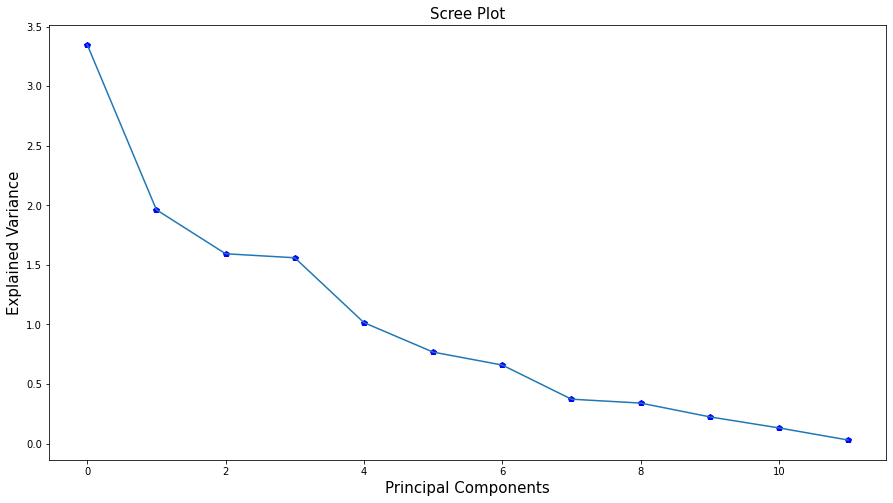

In [39]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# set the axes and plot labels
# set the fontsize using 'fontsize'
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

# display the plot
plt.show()   

`Elbow point`=4

**Interpretation**: It can be observed that, after the elbow point, the principal components do not contribute much to the variance in the data. 

In [40]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[27.897167905862403,
 16.34902916417395,
 13.274326316576579,
 12.994698797454765,
 8.458574042599745,
 6.396354199952958,
 5.4907174870717235,
 3.1023701010661915,
 2.8312075804537553,
 1.8664609513409667,
 1.0930303912472066,
 0.24606306219977372]

Interpretation: It can be seen that the first principal component explains 27.89% variation in the data.

In [41]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

array([ 27.89716791,  44.24619707,  57.52052339,  70.51522218,
        78.97379623,  85.37015043,  90.86086791,  93.96323801,
        96.7944456 ,  98.66090655,  99.75393694, 100.        ])

**Interpretation**: We can see that the first 3 components explain approximately 57.52% of the variation in the data. By considering the 4 components as per the scree plot, the components explain approximately 70.5% of the variation. To explain 96.75% of the variation in the data, we need to consider 9 principal components.<br>
For this dataset, let us choose the `7` principal components that explain 90.86% of the variation.

In [47]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 7, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(df1_scaledpt)

# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC{}'.format(i) for i in range(1,8)])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.985411,0.340003,-0.489591,1.288424,-0.186833,1.338887,-1.039342
1,0.578831,-0.050702,-0.780498,1.438851,0.937714,-0.143896,0.084733
2,0.279439,0.971699,0.470743,0.218240,-0.087787,1.022555,-0.632503
3,-2.642043,0.828942,-2.043893,-1.506059,-0.328336,0.970184,-0.443019
4,2.242307,0.329608,1.239078,1.590864,-0.577655,-0.000224,0.621518


In [100]:
df1_cat=df1.select_dtypes(include=object)
df1_cat.reset_index(inplace=True,drop=True)

In [101]:
dum=df1_cat.loc[:,['verification_status','application_type','term']]
dummy=pd.get_dummies(dum,drop_first=True)
dummy.head()

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,term_ 60 months
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,1,0,0
3,0,0,1,0,0
4,0,1,1,0,1


In [102]:
df1_cat.drop(columns=['verification_status','application_type','term'],inplace=True)


In [103]:
#creating a new data set with the Principal Components
df1_pca=pd.concat([df1_cat,dummy,df_pca],axis=1)
df1_pca.head()

,grade,emp_length,home_ownership,purpose,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,term_ 60 months,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,B,10+ years,RENT,vacation,0,0,1,0,0,0.985411,0.340003,-0.489591,1.288424,-0.186833,1.338887,-1.039342
1,B,4 years,MORTGAGE,debt_consolidation,0,0,1,0,0,0.578831,-0.050702,-0.780498,1.438851,0.937714,-0.143896,0.084733
2,B,< 1 year,RENT,credit_card,1,0,1,0,0,0.279439,0.971699,0.470743,0.218240,-0.087787,1.022555,-0.632503
3,A,6 years,RENT,credit_card,0,0,1,0,0,-2.642043,0.828942,-2.043893,-1.506059,-0.328336,0.970184,-0.443019
4,C,9 years,MORTGAGE,credit_card,0,1,1,0,1,2.242307,0.329608,1.239078,1.590864,-0.577655,-0.000224,0.621518


In [104]:
# bining variables for shake of simplicity
df1_pca['home_ownership']=df1_pca['home_ownership'].replace(['OTHER', 'NONE', 'ANY'],'OTHERS')

In [105]:
X=df1_pca.copy()
y=df1.loan_status

#splitting test train sets with 30:70 ratio respectively

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train_pca.shape)
print('y_train', y_train_pca.shape)

# print dimension of test set
print('X_test', X_test_pca.shape)
print('y_test', y_test_pca.shape)

X_train (277218, 16)
y_train (277218,)
X_test (118809, 16)
y_test (118809,)


In [106]:
X_train_pca.reset_index(inplace=True,drop=True)
y_train_pca.reset_index(inplace=True,drop=True)
X_test_pca.reset_index(inplace=True,drop=True)
y_test_pca.reset_index(inplace=True,drop=True)

In [107]:
#encoding categorical variables

le=LabelEncoder()
Oe=OrdinalEncoder()
Ohe=OneHotEncoder()
clf=WoEEncoder()


# train set

X_train_pca['home_ownership']=clf.fit_transform(X_train_pca[['home_ownership']],y_train_pca)
X_train_pca['purpose']=clf.fit_transform(X_train_pca[['purpose']],y_train_pca)
X_train_pca['grade']=Oe.fit_transform(X_train_pca[['grade']])
X_train_pca['emp_length']=Oe.fit_transform(X_train_pca[['emp_length']])


# test set

X_test_pca['home_ownership']=clf.fit_transform(X_test_pca[['home_ownership']],y_test_pca)
X_test_pca['purpose']=clf.fit_transform(X_test_pca[['purpose']],y_test_pca)
X_test_pca['grade']=Oe.fit_transform(X_test_pca[['grade']])
X_test_pca['emp_length']=Oe.fit_transform(X_test_pca[['emp_length']])


### linear regression on PCA Data

In [66]:
import statsmodels.api as sm

In [73]:
y_train_pca.value_counts()

0    222746
1     54472
Name: loan_status, dtype: int64

In [108]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train_pca,sm.add_constant(X_train_pca)).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.451308
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               277218
Model:                          Logit   Df Residuals:                   277201
Method:                           MLE   Df Model:                           16
Date:                Tue, 20 Sep 2022   Pseudo R-squ.:                 0.08920
Time:                        19:59:10   Log-Likelihood:            -1.2511e+05
converged:                       True   LL-Null:                   -1.3736e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3547      0.153 

In [109]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(sm.add_constant(X_test_pca))

# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [110]:
# Test Report
print(classification_report(y_test_pca,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     95609
           1       0.53      0.07      0.13     23200

    accuracy                           0.81    118809
   macro avg       0.67      0.53      0.51    118809
weighted avg       0.76      0.81      0.74    118809



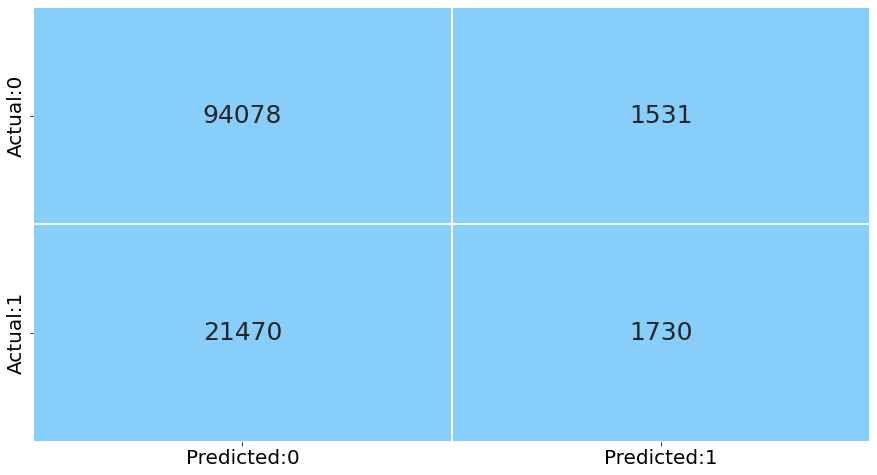

In [111]:
# create the confusion matrix
cm = confusion_matrix(y_test_pca, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

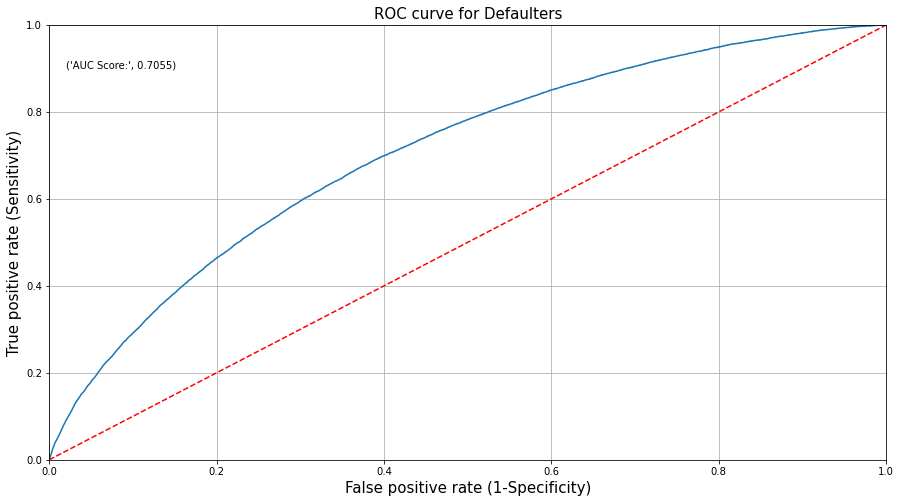

In [112]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Defaulters', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

#### youdens index

In [113]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.674526,0.373469,0.185960,0.301057
1,0.674483,0.373459,0.185969,0.301024
2,0.674310,0.373291,0.186016,0.301019
3,0.673103,0.372088,0.186415,0.301015
4,0.673793,0.372779,0.186181,0.301014


In [114]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob_yoden = logreg.predict(sm.add_constant(X_test_pca))

# convert probabilities to 0 and 1 using 'if_else'
y_pred_yoden = [ 0 if x < 0.18 else 1 for x in y_pred_prob_yoden]

In [115]:
# Test Report
print(classification_report(y_test_pca,y_pred_yoden))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72     95609
           1       0.30      0.69      0.42     23200

    accuracy                           0.62    118809
   macro avg       0.60      0.65      0.57    118809
weighted avg       0.78      0.62      0.66    118809



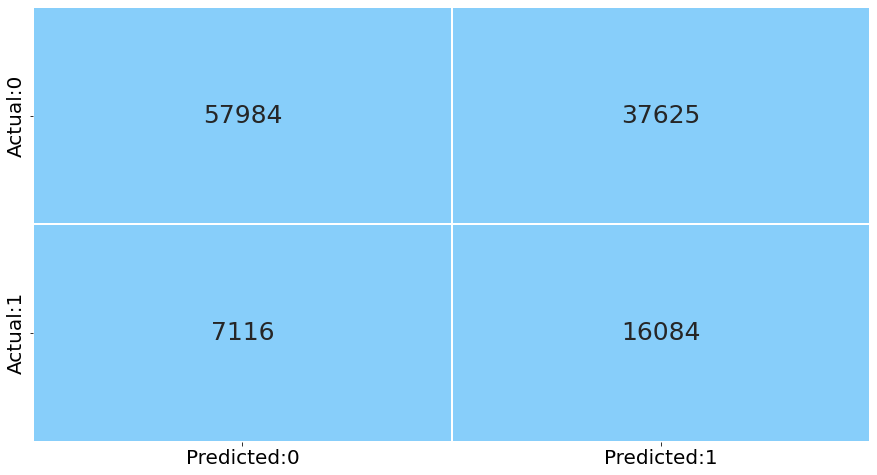

In [117]:
# create the confusion matrix
cm = confusion_matrix(y_test_pca, y_pred_yoden)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

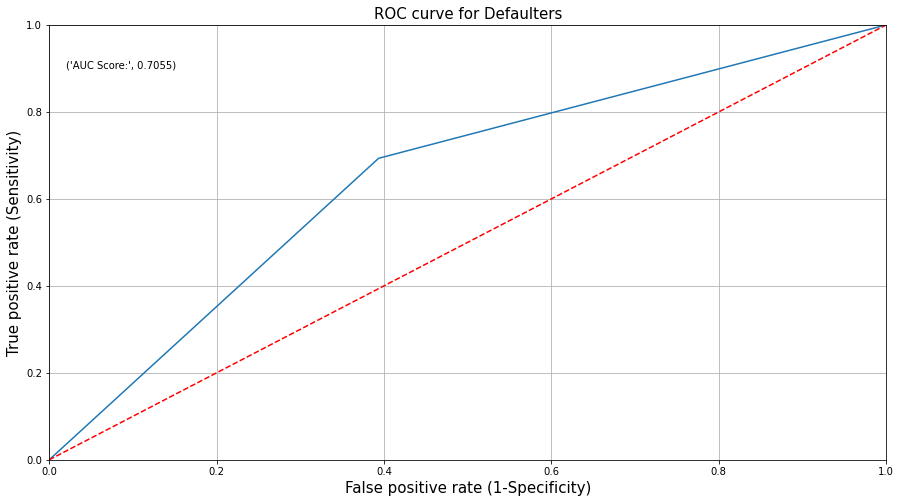

In [118]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_yoden)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Defaulters', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

## Resampling

In [120]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=10)
X_train_resampled,y_train_resampled=ros.fit_resample(X_train_pca,y_train_pca)

In [121]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train_resampled,sm.add_constant(X_train_resampled)).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.623538
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               445492
Model:                          Logit   Df Residuals:                   445475
Method:                           MLE   Df Model:                           16
Date:                Tue, 20 Sep 2022   Pseudo R-squ.:                  0.1004
Time:                        22:43:37   Log-Likelihood:            -2.7778e+05
converged:                       True   LL-Null:                   -3.0879e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.9422      0.111 

In [122]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(sm.add_constant(X_test_pca))

# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [123]:
# Test Report
print(classification_report(y_test_pca,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75     95609
           1       0.31      0.64      0.42     23200

    accuracy                           0.66    118809
   macro avg       0.60      0.65      0.59    118809
weighted avg       0.77      0.66      0.69    118809



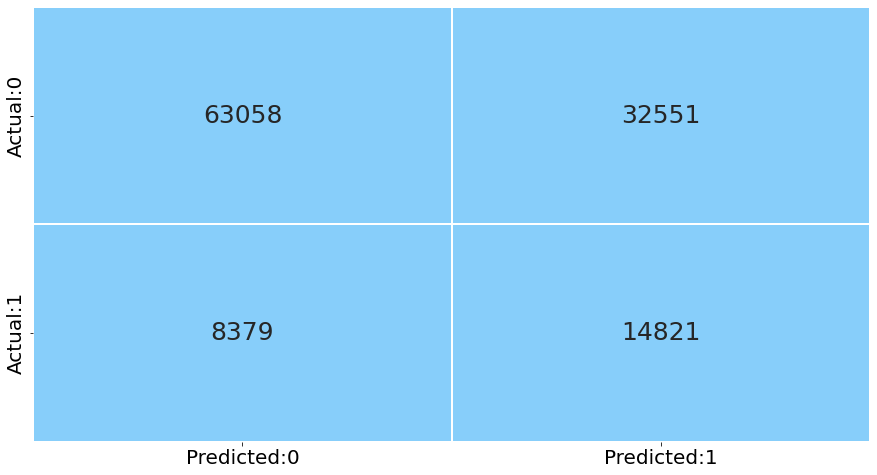

In [124]:
# create the confusion matrix
cm = confusion_matrix(y_test_pca, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

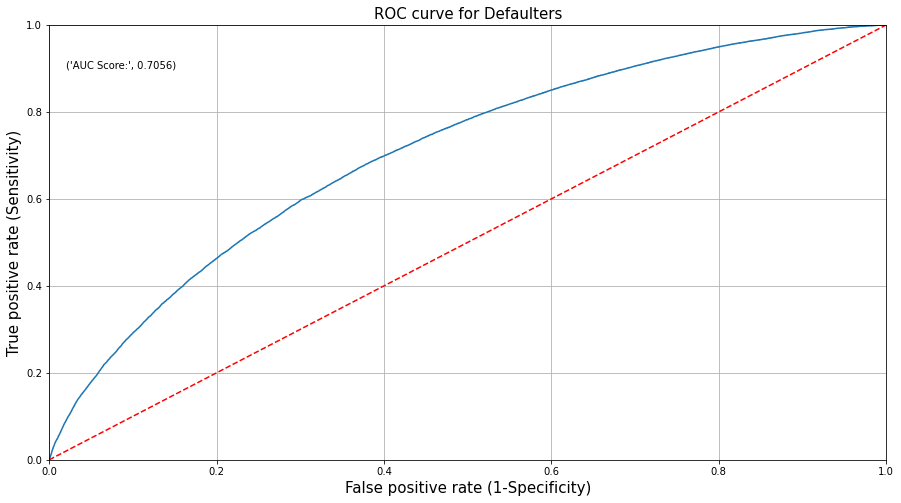

In [125]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Defaulters', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

In [126]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.671379,0.370133,0.484524,0.301247
1,0.671422,0.370185,0.484475,0.301238
2,0.671336,0.370122,0.484541,0.301214
3,0.674569,0.373364,0.482805,0.301205
4,0.671336,0.370133,0.484541,0.301204


In [127]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob_yoden = logreg.predict(sm.add_constant(X_test_pca))

# convert probabilities to 0 and 1 using 'if_else'
y_pred_yoden = [ 0 if x < 0.48 else 1 for x in y_pred_prob_yoden]

In [128]:
# Test Report
print(classification_report(y_test_pca,y_pred_yoden))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73     95609
           1       0.30      0.68      0.42     23200

    accuracy                           0.63    118809
   macro avg       0.60      0.65      0.58    118809
weighted avg       0.77      0.63      0.67    118809



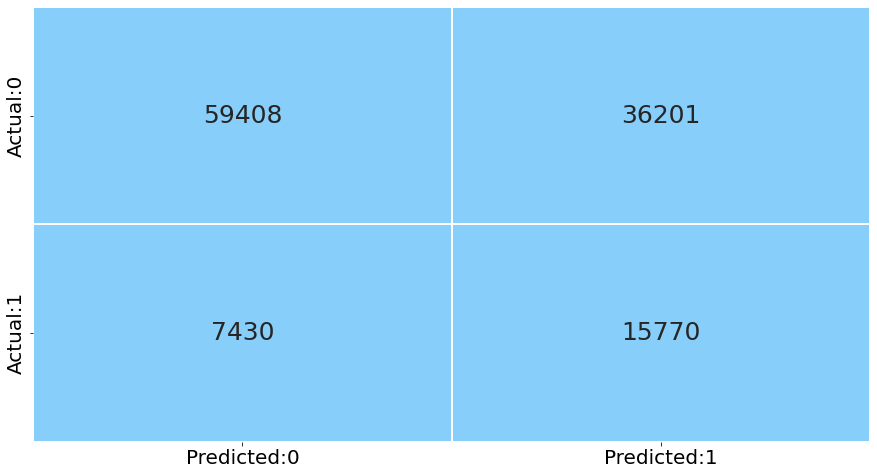

In [130]:
# create the confusion matrix
cm = confusion_matrix(y_test_pca, y_pred_yoden)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

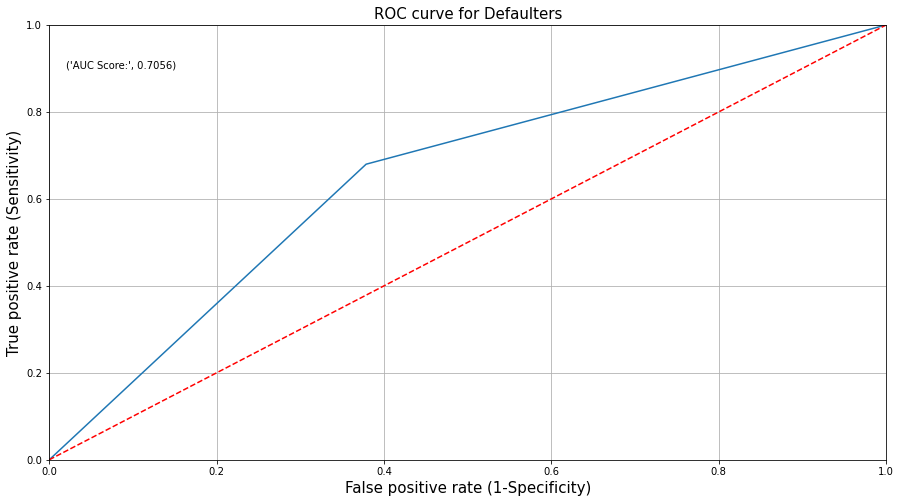

In [131]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_yoden)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Defaulters', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

## LDA

In [133]:
# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [135]:
df1_scaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.492242,-0.491799,-0.408290,0.694323,1.092107,0.912659,-0.335786,0.996727,-0.490616,-0.034885,-0.844169,-0.341284
1,-0.731550,-0.368816,-0.662750,-0.149320,0.577418,1.107302,-0.335786,0.208163,-0.020148,0.133368,0.614391,-0.341284
2,0.177821,-0.704225,0.299610,-0.505321,-0.560058,0.328730,-0.335786,-0.187332,1.571263,0.049241,-0.844169,-0.341284
3,-0.827273,-1.598647,-0.842347,-0.327783,-1.811773,-1.033772,-0.335786,-0.503719,-1.321095,-1.044402,-0.844169,-0.341284
4,1.227785,0.811821,0.707862,-0.311559,2.039185,0.328730,-0.335786,0.424414,0.654872,1.479390,-0.357982,-0.341284


In [136]:
X=df1_scaled.copy()
y=df1.loan_status

#splitting test train sets with 30:70 ratio respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (277218, 12)
y_train (277218,)
X_test (118809, 12)
y_test (118809,)


In [137]:
# instantiate the LDA
# here we have 2 classes in target variable, thus we choose n_components as 2 - 1 = 1
lda = LDA(n_components = 1)

# pass the train data to transform the train and test sets
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [142]:
# define a function to build a decision tree model and calculate the accuracy on the test set
# pass the train and test sets as the 
def decisiontree_model_run(X_train, X_test, y_train, y_test):
    
    # create a decision tree classifier object
    # use 'random_state' to obtain the same results for multiple code runs
    df_tree = DecisionTreeClassifier(random_state=10)
    
    # fit the decision tree model on the train set
    df_tree.fit(X_train, y_train)
    
   
    
    train_pred = df_tree.predict(X_train)

    # return the performace measures on train set
    print(classification_report(y_train, train_pred))


    
    
    test_pred = df_tree.predict(X_test)

    # return the performace measures on train set
    print(classification_report(y_test, test_pred))

In [143]:
decisiontree_model_run(X_train_lda, X_test_lda, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    222746
           1       1.00      0.99      0.99     54472

    accuracy                           1.00    277218
   macro avg       1.00      0.99      1.00    277218
weighted avg       1.00      1.00      1.00    277218

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     95609
           1       0.26      0.26      0.26     23200

    accuracy                           0.71    118809
   macro avg       0.54      0.54      0.54    118809
weighted avg       0.71      0.71      0.71    118809



In [148]:
components = lda.fit_transform(df1_scaledpt,df1['loan_status'])

# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_lda = pd.DataFrame(data = components,columns=['LD'])

# head() to display top five rows of the transformed data
df_lda.head()

,LD
0,0.540791
1,0.487243
2,0.066441
3,1.887166
4,-1.751871


In [149]:
#creating a new data set with the Principal Components
df1_lda=pd.concat([df1_cat,dummy,df_lda],axis=1)
df1_lda.head()

,grade,emp_length,home_ownership,purpose,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,term_ 60 months,LD
0,B,10+ years,RENT,vacation,0,0,1,0,0,0.540791
1,B,4 years,MORTGAGE,debt_consolidation,0,0,1,0,0,0.487243
2,B,< 1 year,RENT,credit_card,1,0,1,0,0,0.066441
3,A,6 years,RENT,credit_card,0,0,1,0,0,1.887166
4,C,9 years,MORTGAGE,credit_card,0,1,1,0,1,-1.751871


In [155]:
# bining variables for shake of simplicity
df1_lda['home_ownership']=df1_lda['home_ownership'].replace(['OTHER', 'NONE', 'ANY'],'OTHERS')

In [156]:
X=df1_lda.copy()
y=df1.loan_status

#splitting test train sets with 30:70 ratio respectively

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X, y, random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train_lda.shape)
print('y_train', y_train_lda.shape)

# print dimension of test set
print('X_test', X_test_lda.shape)
print('y_test', y_test_lda.shape)

X_train (277218, 10)
y_train (277218,)
X_test (118809, 10)
y_test (118809,)


In [157]:
X_train_lda.reset_index(inplace=True,drop=True)
y_train_lda.reset_index(inplace=True,drop=True)
X_test_lda.reset_index(inplace=True,drop=True)
y_test_lda.reset_index(inplace=True,drop=True)

In [158]:
#encoding categorical variables

le=LabelEncoder()
Oe=OrdinalEncoder()
Ohe=OneHotEncoder()
clf=WoEEncoder()


# train set

X_train_lda['home_ownership']=clf.fit_transform(X_train_lda[['home_ownership']],y_train_lda)
X_train_lda['purpose']=clf.fit_transform(X_train_lda[['purpose']],y_train_lda)
X_train_lda['grade']=Oe.fit_transform(X_train_lda[['grade']])
X_train_lda['emp_length']=Oe.fit_transform(X_train_lda[['emp_length']])


# test set

X_test_lda['home_ownership']=clf.fit_transform(X_test_lda[['home_ownership']],y_test_lda)
X_test_lda['purpose']=clf.fit_transform(X_test_lda[['purpose']],y_test_lda)
X_test_lda['grade']=Oe.fit_transform(X_test_lda[['grade']])
X_test_lda['emp_length']=Oe.fit_transform(X_test_lda[['emp_length']])


In [163]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [166]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train_lda, y_train_lda)



GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [170]:
print(get_train_report(gboost_model,X_train_lda))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90    222746
           1       0.82      0.12      0.21     54472

    accuracy                           0.82    277218
   macro avg       0.82      0.56      0.55    277218
weighted avg       0.82      0.82      0.76    277218



In [172]:
print(get_test_report(gboost_model,X_test_lda))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     95609
           1       0.50      0.07      0.13     23200

    accuracy                           0.80    118809
   macro avg       0.66      0.53      0.51    118809
weighted avg       0.75      0.80      0.74    118809



In [177]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
smt=SMOTE(sampling_strategy=0.5)
X_train_resampled,y_train_resampled=smt.fit_resample(X_train_lda,y_train_lda)

In [178]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train_resampled, y_train_resampled)



GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [180]:
print(get_test_report(gboost_model,X_test_lda))

              precision    recall  f1-score   support

           0       0.95      0.00      0.00     95609
           1       0.20      1.00      0.33     23200

    accuracy                           0.20    118809
   macro avg       0.57      0.50      0.16    118809
weighted avg       0.80      0.20      0.06    118809



In [181]:
smt=RandomOverSampler()
X_train_resampled,y_train_resampled=smt.fit_resample(X_train_lda,y_train_lda)

In [182]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train_resampled, y_train_resampled)


GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [183]:
print(get_test_report(gboost_model,X_test_lda))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75     95609
           1       0.31      0.63      0.41     23200

    accuracy                           0.65    118809
   macro avg       0.59      0.64      0.58    118809
weighted avg       0.77      0.65      0.69    118809

